# Gravity
**Description:**  Gridded gravity anomaly data from various sources.

**Datasets:** 

ANTGG (2016) accessed from https://doi.pangaea.de/10.1594/PANGAEA.848168

ANTGG-2021 accessed from https://doi.pangaea.de/10.1594/PANGAEA.971238?format=html#download

Uieda, Leonardo. “Fatiando a Terra Data: Earth - Gravity Grid at 10 Arc-Minute Resolution.” Zenodo, January 20, 2022. https://doi.org/10.5281/zenodo.5882207.

Förste, Christoph, Sean.L. Bruinsma, Oleg Abrikosov, Jean-Michel Lemoine, Jean Charles Marty, Frank Flechtner, G. Balmino, F. Barthelmes, and R. Biancale. “EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse.” Application/octet-stream,application/octet-stream,application/zip. GFZ Data Services, 2014. https://doi.org/10.5880/ICGEM.2015.1.

**Associated papers:** 

Scheinert, M., F. Ferraccioli, J. Schwabe, R. Bell, M. Studinger, D. Damaske, W. Jokat, et al. “New Antarctic Gravity Anomaly Grid for Enhanced Geodetic and Geophysical Studies in Antarctica.” Geophysical Research Letters 43, no. 2 (2016): 600–610. https://doi.org/10.1002/2015GL067439.


In [1]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2

import os

from polartoolkit import fetch, maps, utils

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

In [2]:
data = fetch.gravity(version="antgg")
antgg_grids = [
    data.free_air_anomaly,
    data.bouguer_anomaly,
    data.error,
]

In [3]:
antgg_2021_grids = []

antgg_2021_grids.append(
    fetch.gravity(
        version="antgg-2021",
        anomaly_type="FA",
    ).free_air_anomaly
)
antgg_2021_grids.append(
    fetch.gravity(
        version="antgg-2021",
        anomaly_type="DG",
    ).gravity_disturbance
)
antgg_2021_grids.append(
    fetch.gravity(
        version="antgg-2021",
        anomaly_type="BA",
    ).bouguer_anomaly
)
antgg_2021_grids.append(
    fetch.gravity(
        version="antgg-2021",
        anomaly_type="Err",
    ).error
)

In [4]:
eigen = fetch.gravity(version="eigen").gravity
utils.get_grid_info(eigen)

(5000.0,
 (-3500000.0, 3500000.0, -3500000.0, 3500000.0),
 977667.625,
 980167.75,
 'g')

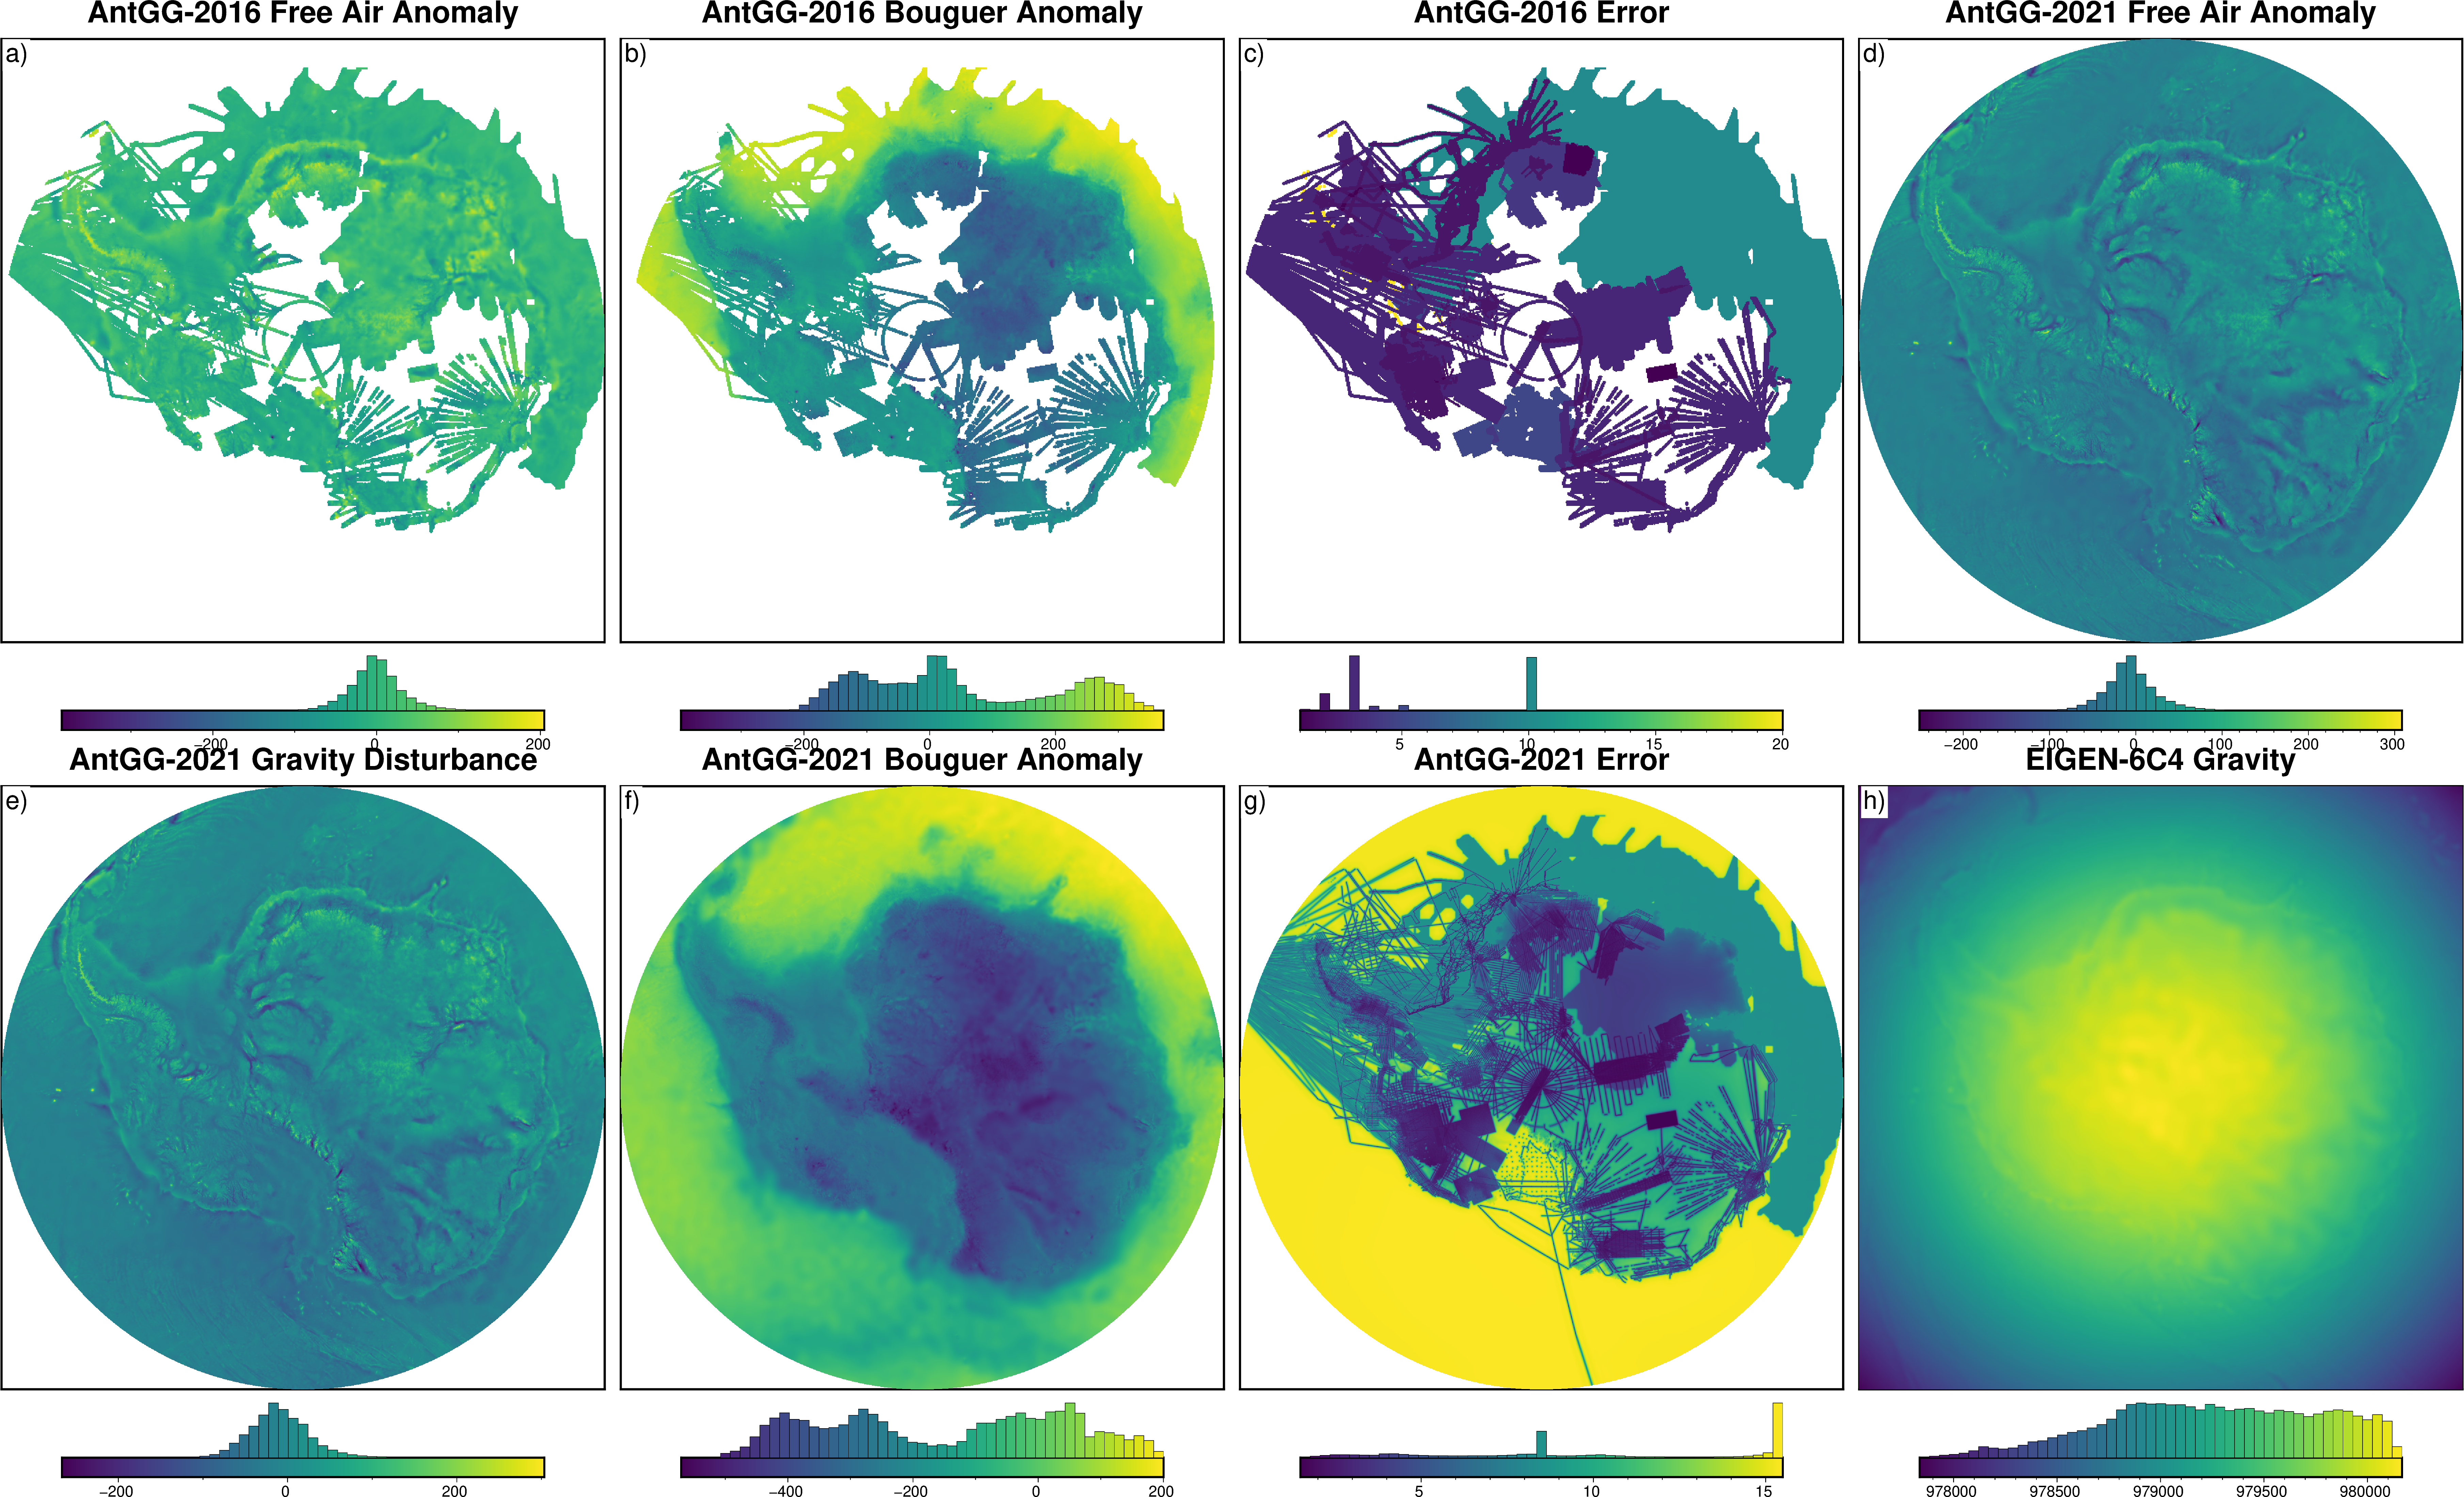

In [12]:
grids = antgg_grids + antgg_2021_grids + [eigen]
titles = [
    "AntGG-2016 Free Air Anomaly",
    "AntGG-2016 Bouguer Anomaly",
    "AntGG-2016 Error",
    "AntGG-2021 Free Air Anomaly",
    "AntGG-2021 Gravity Disturbance",
    "AntGG-2021 Bouguer Anomaly",
    "AntGG-2021 Error",
    "EIGEN-6C4 Gravity",
]
fig = maps.subplots(
    grids,
    titles=titles,
    hist=True,
)

fig.show()